# Q1 - Relação sinecológica (70 pontos)


A sinecologia é o ramo da Ecologia que analisa as relações entre indivíduos pertencentes a diversas espécies e o meio em que elas vivem, ou seja, ela estuda o comportamento das comunidades biológicas. A sinecologia busca explicar como várias espécies de seres vivos interagem entre si e como são influenciadas pelas diversas condições ambientais do meio em que elas vivem.


Considere um modelo de um sistema  de quatro espécies denominadas $S_1, S_2, S_3$ e $S_4$.

A espécie $S_2$ é um predador sobrevivendo da presa $S_1$.
A presa $S_1$ por sua vez é um comensal do hospedeiro $S_3$ que está em mutualismo com a quarta espécie $S_4$.

Além disso, $S_2$ e $S_4$ são espécies neutras. Espécies neutras têm nichos completamente sobrepostos (elas compartilham o mesmo nicho).

Em todos os casos considere a competição intraespecífica.
As equações modelo do sistema constituem um conjunto de quatro equações acopladas diferenciais ordinárias não lineares de primeira ordem.


Considerando o exposto acima, apresente o que se pede

1. Crie um modelo do sistema dinâmico descrito acima, descrevendo as variáveis e os parâmetros que se fizerem necessários.

2. Determine os pontos fixos do sistema e faça a análise de estabilidade

3. Escolha  um conjunto de parâmetros e apresente uma simulação do sistema. Justifique as escolhas.



## Contextualização

- **Modelo Matemático**
    - Vamos  desenvolver o modelo que considera a interação entre as espécies *S1*, *S2*, *S3* e *S4*.
    - Herdaremos o modelo de crescimento logístico e modificaremos o mesmo, incluindo os fatores que caracterizam as relações entre as espécies envolvidas.
    - Considerando os fatores de predação, comensalismo, mutualismo e neutralidade, temos as seguintes equações:
           
\begin{matrix}
\Delta S_1 &=& (K_1 ⋅ S_1) - (neg_{12} ⋅ S_1 ⋅ S_2) + (pos_{13} ⋅ S_1 ⋅ S_3)\\
\\
\Delta S_2 &=& (pos_{12} ⋅ S_1 ⋅ S_2) - (neg_{24} ⋅ S_4 ⋅ S_2)\\
\\
\Delta S_3 &=& (K_3 ⋅ S_3) + (pos_{34} ⋅ S_3 ⋅ S_4)\\
\\
\Delta S_4 &=& (K_4 ⋅ S_4) + (pos_{34} ⋅ S_3 ⋅ S_4) - (neg_{24} ⋅ S_4 ⋅ S_2)\\
\end{matrix}

\
### Legenda:

- S1:
  * O primeiro termo "$(K_1 ⋅ S_1)$" se refere ao crescimento individual da própria espécie.

  * O segundo termo "$-(neg_{12} ⋅ S_1 ⋅ S_2)$" representa a relação que S1 possui de presa de S2.

  * O terceiro termo "$(pos_{13} ⋅ S_1 ⋅ S_3)$" determina a relação de comensalismo que possui com o S3.

\
- S2:
  * O primeiro termo "$(pos_{12} ⋅ S_1 ⋅ S_2)$" representa a relação que S2 possui de predador de S1.

  * O segundo termo "$- (neg_{24} ⋅ S_4 ⋅ S_2)$" determina a interação que S2 possui com S4, por mais que seja uma relação de neutralidade, as espécies compartilham o mesmo nicho.

  * **OBS:** Vale ressaltar que o S2 não possui um termo do crescimento individual uma vez que a espécie se alimenta especificamente de S1 e a não existência de S1 leva S2 à extinção.

\
- S3:
  * O primeiro termo "$(K_3 ⋅ S_3)$" se refere ao crescimento individual da própria espécie.

  * O segundo termo "$(pos_{34} ⋅ S_3 ⋅ S_4)$" representa a relação que S3 possui de mutualismo com S4.

\
- S4:
  * O primeiro termo "$(K_4 ⋅ S_4)$" se refere ao crescimento individual da própria espécie.

  * O segundo termo "$(pos_{34} ⋅ S_3 ⋅ S_4)$" representa a relação que S4 possui de mutualismo com S3.

  * o terceiro termo "$-(neg_{24} ⋅ S_4 ⋅ S_2)$" determina a interação que S4 possui com S2, por mais que seja uma relação de neutralidade, as espécies compartilham o mesmo nicho.

\
- Os coeficientes das equações representam:
    - $K_1$, $K_3$, $K_4$ - Taxa de crescimento populacional da espécie.

    - $S_1$, $S_2$, $S_3$, $S_4$ - Denotação da população de cada espécie.

    - $neg_{12}$, $neg_{24}$ - Relações negativas entre as espécies.

    - $pos_{12}$, $pos_{13}$, $pos_{34}$ - Relações positivas entre as espécies
    
  

    

      


## Proposta de solução

In [ ]:
import sympy as sp
sp.init_printing()

k_1, k_3, k_4, neg_12, pos_12, pos_13, neg_24, pos_34 = sp.var('k_1 k_3 k_4 neg_12 pos_12 pos_13 neg_24 pos_34')

S_1, S_2, S_3, S_4 = sp.var('S_1 S_2 S_3 S_4')

In [ ]:
u = sp.Matrix([S_1, S_2, S_3, S_4])
F = sp.Matrix([
                [(k_1 * S_1) - (neg_12 * S_1 * S_2) + (pos_13 * S_1 * S_3)],
                [(pos_12 * S_1 * S_2) - (neg_24 * S_4 * S_2)],
                [(k_3 * S_3) + (pos_34 * S_3 * S_4)],
                [(k_4 * S_4) + (pos_34 * S_3 * S_4) - (neg_24 * S_4 * S_2)],
              ])

p = {'k_1':0.4, 'k_3':0.1, 'k_4':0.1, 'neg_12':0.01, 'pos_12':0.05, 'pos_13':0.01, 'neg_24':0.05, 'pos_34':0.02}

F = F.subs(p)

u, F

⎛⎡S₁⎤  ⎡-0.01⋅S₁⋅S₂ + 0.01⋅S₁⋅S₃ + 0.4⋅S₁⎤⎞
⎜⎢  ⎥  ⎢                                 ⎥⎟
⎜⎢S₂⎥  ⎢     0.05⋅S₁⋅S₂ - 0.05⋅S₂⋅S₄     ⎥⎟
⎜⎢  ⎥, ⎢                                 ⎥⎟
⎜⎢S₃⎥  ⎢       0.02⋅S₃⋅S₄ + 0.1⋅S₃       ⎥⎟
⎜⎢  ⎥  ⎢                                 ⎥⎟
⎝⎣S₄⎦  ⎣-0.05⋅S₂⋅S₄ + 0.02⋅S₃⋅S₄ + 0.1⋅S₄⎦⎠

In [ ]:
delta = u-F
delta

⎡0.01⋅S₁⋅S₂ - 0.01⋅S₁⋅S₃ + 0.6⋅S₁⎤
⎢                                ⎥
⎢ -0.05⋅S₁⋅S₂ + 0.05⋅S₂⋅S₄ + S₂  ⎥
⎢                                ⎥
⎢      -0.02⋅S₃⋅S₄ + 0.9⋅S₃      ⎥
⎢                                ⎥
⎣0.05⋅S₂⋅S₄ - 0.02⋅S₃⋅S₄ + 0.9⋅S₄⎦

In [ ]:
#Gerar as soluções
solutions = sp.solve(delta,u, dict=True)

for s in solutions:
    display(s)

{S₁: 0.0, S₂: -18.0, S₃: 0.0, S₄: -20.0}

{S₁: 0.0, S₂: 0.0, S₃: 0.0, S₄: 0.0}

{S₁: 0.0, S₂: 0.0, S₃: 45.0, S₄: 45.0}

{S₁: 20.0, S₂: -60.0, S₃: 0.0, S₄: 0.0}

{S₁: 65.0, S₂: 10.0, S₃: 70.0, S₄: 45.0}

In [ ]:
F

⎡-0.01⋅S₁⋅S₂ + 0.01⋅S₁⋅S₃ + 0.4⋅S₁⎤
⎢                                 ⎥
⎢     0.05⋅S₁⋅S₂ - 0.05⋅S₂⋅S₄     ⎥
⎢                                 ⎥
⎢       0.02⋅S₃⋅S₄ + 0.1⋅S₃       ⎥
⎢                                 ⎥
⎣-0.05⋅S₂⋅S₄ + 0.02⋅S₃⋅S₄ + 0.1⋅S₄⎦

In [ ]:
J = F.jacobian(u)
J

⎡-0.01⋅S₂ + 0.01⋅S₃ + 0.4      -0.01⋅S₁          0.01⋅S₁                0     
⎢                                                                             
⎢        0.05⋅S₂           0.05⋅S₁ - 0.05⋅S₄        0                -0.05⋅S₂ 
⎢                                                                             
⎢           0                      0          0.02⋅S₄ + 0.1          0.02⋅S₃  
⎢                                                                             
⎣           0                  -0.05⋅S₄          0.02⋅S₄     -0.05⋅S₂ + 0.02⋅S

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
₃ + 0.1⎦

In [ ]:
for s in solutions:
    print('-'*80)
    print(s)
    # s1 = [s[a].subs(p) for a in s]
    # print(s1)
    print('-'*80)
    display(J.subs(s))
    P, L = J.subs(s).diagonalize()
    display(L)
    for i in range(L.shape[0]):
        print('autovalor ', i, L[i,i].subs(p))

--------------------------------------------------------------------------------
{S_1: 0.0, S_2: -18.0000000000000, S_3: 0.0, S_4: -20.0000000000000}
--------------------------------------------------------------------------------


⎡0.58   0    0     0 ⎤
⎢                    ⎥
⎢-0.9  1.0   0    0.9⎥
⎢                    ⎥
⎢ 0     0   -0.3   0 ⎥
⎢                    ⎥
⎣ 0    1.0  -0.4  1.0⎦

⎡-0.3          0            0           0        ⎤
⎢                                                ⎥
⎢ 0    0.0513167019494862   0           0        ⎥
⎢                                                ⎥
⎢ 0            0           0.58         0        ⎥
⎢                                                ⎥
⎣ 0            0            0    1.94868329805051⎦

autovalor  0 -0.300000000000000
autovalor  1 0.0513167019494862
autovalor  2 0.580000000000000
autovalor  3 1.94868329805051
--------------------------------------------------------------------------------
{S_1: 0.0, S_2: 0.0, S_3: 0.0, S_4: 0.0}
--------------------------------------------------------------------------------


⎡0.4  0   0    0 ⎤
⎢                ⎥
⎢ 0   0   0    0 ⎥
⎢                ⎥
⎢ 0   0  0.1   0 ⎥
⎢                ⎥
⎣ 0   0   0   0.1⎦

⎡0.4  0   0    0 ⎤
⎢                ⎥
⎢ 0   0   0    0 ⎥
⎢                ⎥
⎢ 0   0  0.1   0 ⎥
⎢                ⎥
⎣ 0   0   0   0.1⎦

autovalor  0 0.400000000000000
autovalor  1 0
autovalor  2 0.100000000000000
autovalor  3 0.100000000000000
--------------------------------------------------------------------------------
{S_1: 0.0, S_2: 0.0, S_3: 45.0000000000000, S_4: 45.0000000000000}
--------------------------------------------------------------------------------


⎡0.85    0     0    0 ⎤
⎢                     ⎥
⎢ 0    -2.25   0    0 ⎥
⎢                     ⎥
⎢ 0      0    1.0  0.9⎥
⎢                     ⎥
⎣ 0    -2.25  0.9  1.0⎦

⎡0.85    0     0    0 ⎤
⎢                     ⎥
⎢ 0    -2.25   0    0 ⎥
⎢                     ⎥
⎢ 0      0    0.1   0 ⎥
⎢                     ⎥
⎣ 0      0     0   1.9⎦

autovalor  0 0.850000000000000
autovalor  1 -2.25000000000000
autovalor  2 0.100000000000000
autovalor  3 1.90000000000000
--------------------------------------------------------------------------------
{S_1: 20.0000000000000, S_2: -60.0000000000000, S_3: 0.0, S_4: 0.0}
--------------------------------------------------------------------------------


⎡1.0   -0.2  0.2   0 ⎤
⎢                    ⎥
⎢-3.0  1.0    0   3.0⎥
⎢                    ⎥
⎢ 0     0    0.1   0 ⎥
⎢                    ⎥
⎣ 0     0     0   3.1⎦

⎡0.225403330758517         0           0    0 ⎤
⎢                                             ⎥
⎢        0          1.77459666924148   0    0 ⎥
⎢                                             ⎥
⎢        0                 0          0.1   0 ⎥
⎢                                             ⎥
⎣        0                 0           0   3.1⎦

autovalor  0 0.225403330758517
autovalor  1 1.77459666924148
autovalor  2 0.100000000000000
autovalor  3 3.10000000000000
--------------------------------------------------------------------------------
{S_1: 65.0000000000000, S_2: 10.0000000000000, S_3: 70.0000000000000, S_4: 45.0000000000000}
--------------------------------------------------------------------------------


⎡1.0  -0.65  0.65   0  ⎤
⎢                      ⎥
⎢0.5   1.0    0    -0.5⎥
⎢                      ⎥
⎢ 0     0    1.0   1.4 ⎥
⎢                      ⎥
⎣ 0   -2.25  0.9   1.0 ⎦

⎡-0.303195605505596          0                 0                 0       ⎤
⎢                                                                        ⎥
⎢        0           0.398600620393649         0                 0       ⎥
⎢                                                                        ⎥
⎢        0                   0          1.60139937960635         0       ⎥
⎢                                                                        ⎥
⎣        0                   0                 0          2.3031956055056⎦

autovalor  0 -0.303195605505596
autovalor  1 0.398600620393649
autovalor  2 1.60139937960635
autovalor  3 2.30319560550560


---
---


In [ ]:
import numpy as np
import pylab as pl

# x_0 => Representa os valores iniciais

#Evolução do sistema no tempo:
def evolui_sistema(x_0, n):
  # n => Representa o número de iterações

  k_1 = 0.4
  k_3 = 0.1
  k_4 = 0.1
  neg_12 = 0.01
  pos_12 = 0.05
  pos_13 = 0.01
  neg_24 = 0.05
  pos_34 = 0.02
  x = np.zeros ((n, 4))
  x[0, :] = x_0

  for i in range(0, n-1):
    x[i+1, 0] = ((k_1 * x[i,0]) - (neg_12 * x[i,0] * x[i,1]) + (pos_13 * x[i,0] * x[i,2]))
    x[i+1, 1] = ((pos_12 * x[i,0] * x[i,1]) - (neg_24 * x[i,3] * x[i,1]))
    x[i+1, 2] = ((k_3 * x[i,2]) + (pos_34 * x[i,2] * x[i,3]))
    x[i+1, 3] = ((k_4 * x[i,3]) + (pos_34 * x[i,2] * x[i,3]) - (neg_24 * x[i,3] * x[i,1]))
    print('Iteração: ', i, '|', x[i+1, 0], ', ', x[i+1, 1], ', ', x[i+1, 2], ', ', x[i+1, 3], '|')

  return (x)

Gerando o sitema com as condições inciais iguais ao ponto fixo ${S_1= 65, S_2= 10, S_3= 70, S_4= 45}$:

In [ ]:
x_0 = np.array ([65, 10, 70, 45])
especies = evolui_sistema (x_0, 50)

Iteração:  0 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  1 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  2 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  3 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  4 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  5 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  6 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  7 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  8 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  9 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  10 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  11 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  12 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  13 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  14 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  15 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  16 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  17 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  18 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  19 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  20 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  21 | 65.0 , 

Iteração:  0 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  1 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  2 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  3 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  4 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  5 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  6 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  7 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  8 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  9 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  10 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  11 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  12 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  13 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  14 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  15 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  16 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  17 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  18 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  19 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  20 | 65.0 ,  10.0 ,  70.0 ,  45.0 |
Iteração:  21 | 65.0 , 

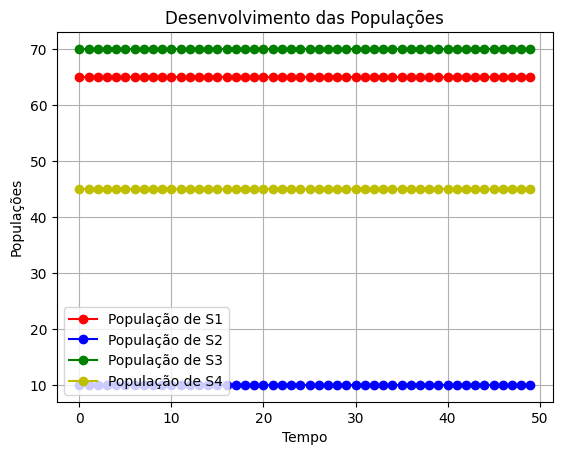

In [ ]:
x_0 = np.array ([65, 10, 70, 45])
especies = evolui_sistema (x_0, 50)

import pylab as pl

pl.plot(especies[:,0],'ro-', label='População de S1')
pl.plot(especies[:,1],'bo-', label='População de S2')
pl.plot(especies[:,2],'go-', label='População de S3')
pl.plot(especies[:,3],'yo-', label='População de S4')
pl.xlabel('Tempo')
pl.ylabel('Populações')
pl.title("Desenvolvimento das Populações")
pl.legend()
pl.grid()

Sensibilidade aos parâmetros iniciais:

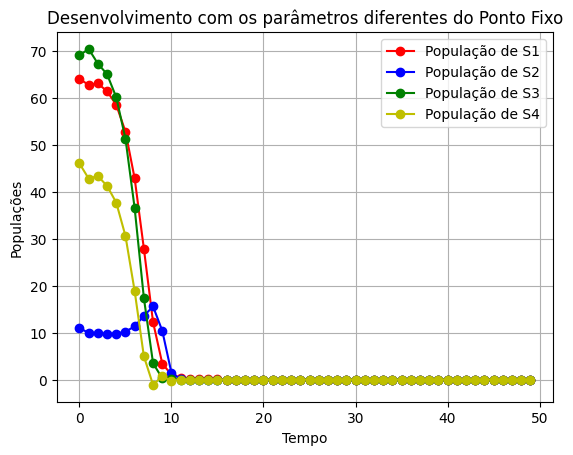

In [ ]:
# Plot do gráfico:
import pylab as pl

pl.plot(especies[:,0],'ro-', label='População de S1')
pl.plot(especies[:,1],'bo-', label='População de S2')
pl.plot(especies[:,2],'go-', label='População de S3')
pl.plot(especies[:,3],'yo-', label='População de S4')
pl.xlabel('Tempo')
pl.ylabel('Populações')
pl.title("Desenvolvimento com os parâmetros diferentes do Ponto Fixo")
pl.legend()
pl.grid()

## Discussão da solução encontrada




Como todos os autovalores encontrados para os pontos de equílibrio são, em módulo, maiores do que 1, pode-se dizer que o modelo é instável ao redor dos pontos fixos. Além disso, é possível perceber, através do gráfico, que, apesar de ser estável no ponto fixo, este é instável.



---



# T1Q2 - Modelagem de um tanque de  aquicultura (30 pontos)


No sistema de aquicultura, os resíduos metabólicos na forma de pellets (veja a imagem abaixo) não alimentados e a excreção de peixes podem reduzir a qualidade da água e aumentar tanto a matéria orgânica solúvel nas águas quanto a deposição orgânica nos sedimentos.


O modelo abaixo representa um  sistema dinâmico  com base nas interações que ocorrem entre o crescimento do fitoplâncton, a densidade do macrobenthos e
sedimento em resposta às concentrações de nitrogênio e fosfato.


O nível de qualidade da água no sistema de aquicultura é determinada com base na interação entre cinco variáveis, ou seja, nitrogênio ($N$), fosfato ($F$), abundância de fitoplâncton  ($P$), abundância de macrobentos  ($M$) e propriedades dos sedimentos ($S$).



O modelo de sistema dinâmico considera a interação entre nitrogênio ($N$), fosfato ($F$), fitoplâncton ($P$) e
sedimento ($S$) adicionando a variável macrobenthos ($M$).
No sedimento existe macrobentos (M) que é um organismo vivo na forma de animais e plantas. A seguir mostra o desenvolvimento de um modelo de sistema dinâmico com a adição da variável macrobenthos (M).


O objetivo é analisar a estabilidade do sistema dinâmico que se escreve como


$$
\begin{matrix}
\Delta P &=& \frac{\delta NP}{K_N+N} + \frac{\delta FP}{K_F+F} -(d+\gamma)P \\
\Delta N &=& \Lambda_N + \omega \theta S - \gamma N  - \frac{\delta NP}{K_N+N}\\
\Delta F &=& \Lambda_F +(1-\omega) \theta S -\gamma F -\frac{\delta FP}{K_F+F}\\
\Delta M &=& d(1-\mu)P - (\gamma+\tau)M\\
\Delta S &=& d\mu P + \tau M - \theta S\\
\end{matrix}
$$


onde $\mu$ é a taxa de sedimentação do fitoplâncton, $\delta$ é a taxa máxima de crescimento do fitoplâncton, $d$ é o total mortalidade do fitoplâncton, $\gamma$ é a taxa de troca de água, $\omega$ é a proporção da taxa de remineralização do nitrogênio, $\theta$ é remineralização total do sedimento, $\tau$ é a taxa de sedimentação para macrobentos, $\Lambda_N$ é a entrada da alimentação restante e excreção de peixe para nitrogênio,  $\Lambda_F$ é a entrada da alimentação restante e excreção de peixe para fosfato, e
$K_N$ e $K_F$ são as constantes de meia-saturação de nitrogênio e fosfato.


2. Detemine os pontos fixos do sistema e discuta a estabilidade de cada um deles.

1. Use os parâmetros abaixo e realize simulações numéricas dos sistema considerando a resposta do item anterior.
(
$\mu$,  $\gamma$,  $\tau$, $\omega$, $\theta$,
$\delta$, $d$, $K_N$, $K_F$,
$\Lambda_N$,$\Lambda_F$
)
$=
(
0.1155, 3.0521, 0.0103, 0.6749, 0.5482, -0.0406, 0.3740, 0.0207, 0.0017, 1.15, 0.97
)
$


Os parâmetros $\mu$,  $\gamma$,  $\tau$, $\delta$ têm unidade em dia$^{-1}$,
$\omega$, $\theta$ e $d$ são adimensionais,
$K_N$, $K_F$ em g/m$^3$ e
$\Lambda_N$, $\Lambda_F$ tem como unidade mg g$^{-1}$ dia$^{-1}$.

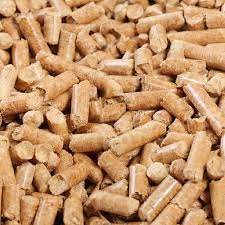

# Proposta de Solução

In [ ]:
#Importando os pacotes:
import numpy as np
import matplotlib.pyplot as pl
import random
import sympy as sp

In [ ]:
#Montando a matriz para o cálculo dos autovalores:
sp.init_printing()

P, N, F, M, S = sp.var('P N F M S')
mi,gama,tau,omega,theta,delta,d,K_N,K_F,lambda_N,lambda_F = sp.var('mi gama tau omega theta delta d K_N K_F lambda_N lambda_F')


u = sp.Matrix([P, N, F, M, S])

Y = sp.Matrix([
                [((delta * N * P)/(K_N + N)) + ((delta * F * P)/(K_F + F)) - ((d + gama) * P)],
                [(lambda_N) + (omega * theta * S) - (gama * N) - ((delta * N * P)/(K_N + N))],
                [(lambda_F) + ((1 - omega) * theta * S) - (gama * F) - ((delta * F * P)/(K_F + F))],
                [(d * (1 - mi) * P) - ((gama + tau) * M)],
                [(d * mi * P) + (tau * M) - (theta * S)],
              ])
params = {'mi':0.1155, 'gama':3.0521, 'tau':0.0103, 'omega':0.6749, 'theta':0.5482, 'delta':-0.0406, 'd':0.3740,'K_N':0.0207, 'K_F':0.0017,'lambda_N':1.15, 'lambda_F':0.97}

Y = Y.subs(params)

u, Y

⎛     ⎡     0.0406⋅F⋅P   0.0406⋅N⋅P               ⎤⎞
⎜     ⎢   - ────────── - ────────── - 3.4261⋅P    ⎥⎟
⎜     ⎢     F + 0.0017   N + 0.0207               ⎥⎟
⎜⎡P⎤  ⎢                                           ⎥⎟
⎜⎢ ⎥  ⎢0.0406⋅N⋅P                                 ⎥⎟
⎜⎢N⎥  ⎢────────── - 3.0521⋅N + 0.36998018⋅S + 1.15⎥⎟
⎜⎢ ⎥  ⎢N + 0.0207                                 ⎥⎟
⎜⎢F⎥, ⎢                                           ⎥⎟
⎜⎢ ⎥  ⎢0.0406⋅F⋅P                                 ⎥⎟
⎜⎢M⎥  ⎢────────── - 3.0521⋅F + 0.17821982⋅S + 0.97⎥⎟
⎜⎢ ⎥  ⎢F + 0.0017                                 ⎥⎟
⎜⎣S⎦  ⎢                                           ⎥⎟
⎜     ⎢          -3.0624⋅M + 0.330803⋅P           ⎥⎟
⎜     ⎢                                           ⎥⎟
⎝     ⎣     0.0103⋅M + 0.043197⋅P - 0.5482⋅S      ⎦⎠

In [ ]:
variacao = u-Y
variacao

⎡     0.0406⋅F⋅P   0.0406⋅N⋅P                 ⎤
⎢     ────────── + ────────── + 4.4261⋅P      ⎥
⎢     F + 0.0017   N + 0.0207                 ⎥
⎢                                             ⎥
⎢  0.0406⋅N⋅P                                 ⎥
⎢- ────────── + 4.0521⋅N - 0.36998018⋅S - 1.15⎥
⎢  N + 0.0207                                 ⎥
⎢                                             ⎥
⎢  0.0406⋅F⋅P                                 ⎥
⎢- ────────── + 4.0521⋅F - 0.17821982⋅S - 0.97⎥
⎢  F + 0.0017                                 ⎥
⎢                                             ⎥
⎢            4.0624⋅M - 0.330803⋅P            ⎥
⎢                                             ⎥
⎣      -0.0103⋅M - 0.043197⋅P + 1.5482⋅S      ⎦

In [ ]:
#Gerar as soluções
solutions = sp.solve(variacao,u, dict=True)

In [ ]:
for s in solutions:
    display(s)

{F: -0.00168467776081284, M: 0.0178392665197418 + 2.11758236813575e-22⋅ⅈ, N: 0
.286419463703526, P: 0.219073697366103 - 1.6940658945086e-21⋅ⅈ, S: 0.006231152
91969829 - 0.e-25⋅ⅈ}

{F: 0.239382048814195, M: 0.0, N: 0.283803459934355, P: 0.0, S: 0.0}

{F: 0.242481735957073, M: 0.0225350365709631 + 1.58818677610181e-22⋅ⅈ, N: -0.0
205135307818258, P: 0.276739728980331 + 1.6940658945086e-21⋅ⅈ, S: 0.0078713583
1897965 + 0.e-25⋅ⅈ}

{F: -0.00166541414914254 + 2.64697796016969e-23⋅ⅈ, M: 0.0407893887304547 - 4.2
351647362715e-22⋅ⅈ, N: -0.0203653961040795, P: 0.500910852618021 - 6.776263578
0344e-21⋅ⅈ, S: 0.0142474982589228 - 0.e-24⋅ⅈ}

In [ ]:
J = Y.jacobian(u)
J

⎡   0.0406⋅F     0.0406⋅N                   0.0406⋅N⋅P     0.0406⋅P           
⎢- ────────── - ────────── - 3.4261       ───────────── - ──────────          
⎢  F + 0.0017   N + 0.0207                            2   N + 0.0207          
⎢                                         (N + 0.0207)                        
⎢                                                                             
⎢             0.0406⋅N                   0.0406⋅N⋅P     0.0406⋅P              
⎢            ──────────              - ───────────── + ────────── - 3.0521    
⎢            N + 0.0207                            2   N + 0.0207             
⎢                                      (N + 0.0207)                           
⎢                                                                             
⎢             0.0406⋅F                                                        
⎢            ──────────                                0                    - 
⎢            F + 0.0017                             

In [ ]:
for s in solutions:
    print('-'*80)
    print(s)
    # s1 = [s[a].subs(p) for a in s]
    # print(s1)
    print('-'*80)
    display(J.subs(s))
    P, L = J.subs(s).diagonalize()
    display(L)
    for i in range(L.shape[0]):
        print('autovalor ', i, L[i,i].subs(params))

--------------------------------------------------------------------------------
{F: -0.00168467776081284, M: 0.0178392665197418 + 2.11758236813575e-22*I, N: 0.286419463703526, P: 0.219073697366103 - 1.6940658945086e-21*I, S: 0.00623115291969829 - 0.e-25*I}
--------------------------------------------------------------------------------


⎡ 1.00000000000002   -0.00195196459258249 + 1.50942659175388e-23⋅ⅈ  -64405.168
⎢                                                                             
⎢0.0378635404156238   -3.05014803540742 - 1.50942659175388e-23⋅ⅈ              
⎢                                                                             
⎢-4.46396354041564                         0                        64402.1159
⎢                                                                             
⎢     0.330803                             0                                  
⎢                                                                             
⎣     0.043197                             0                                  

0544504 + 4.98036048795062e-16⋅ⅈ     0         0     ⎤
                                                     ⎥
          0                          0     0.36998018⎥
                                                     ⎥
544504 - 4.98036048795062e-16⋅ⅈ      0     0.17821982⎥
             

⎡64406.5798893269 - 4.98036049016699e-16⋅ⅈ                      0             
⎢                                                                             
⎢                    0                      -3.05010553651764 - 1.519860274089
⎢                                                                             
⎢                    0                                          0             
⎢                                                                             
⎢                    0                                          0             
⎢                                                                             
⎣                    0                                          0             

                              0                                          0    
                                                                              
98e-23⋅ⅈ                      0                                          0    
                                                   

autovalor  0 64406.5798893269 - 4.98036049016699e-16*I
autovalor  1 -3.05010553651764 - 1.51986027408998e-23*I
autovalor  2 -3.0631928837275 + 1.28010495045923e-24*I
autovalor  3 -3.46590054210247 - 9.87939850067001e-25*I
autovalor  4 -0.545483949589181 + 3.38086923142412e-26*I
--------------------------------------------------------------------------------
{F: 0.239382048814195, M: 0.0, N: 0.283803459934355, P: 0.0, S: 0.0}
--------------------------------------------------------------------------------


⎡-3.50425373878787      0        0        0         0     ⎤
⎢                                                         ⎥
⎢0.037840031360625   -3.0521     0        0     0.36998018⎥
⎢                                                         ⎥
⎢0.0403137074272453     0     -3.0521     0     0.17821982⎥
⎢                                                         ⎥
⎢     0.330803          0        0     -3.0624      0     ⎥
⎢                                                         ⎥
⎣     0.043197          0        0     0.0103    -0.5482  ⎦

⎡-3.0521     0        0             0             0   ⎤
⎢                                                     ⎥
⎢   0     -3.0521     0             0             0   ⎥
⎢                                                     ⎥
⎢   0        0     -3.0624          0             0   ⎥
⎢                                                     ⎥
⎢   0        0        0     -3.50425373878787     0   ⎥
⎢                                                     ⎥
⎣   0        0        0             0          -0.5482⎦

autovalor  0 -3.05210000000000
autovalor  1 -3.05210000000000
autovalor  2 -3.06240000000000
autovalor  3 -3.50425373878787
autovalor  4 -0.548200000000000
--------------------------------------------------------------------------------
{F: 0.242481735957073, M: 0.0225350365709631 + 1.58818677610181e-22*I, N: -0.0205135307818258, P: 0.276739728980331 + 1.6940658945086e-21*I, S: 0.00787135831897965 + 0.e-25*I}
--------------------------------------------------------------------------------


⎡       1.0          -6688.88286151463 - 4.09460845025991e-17⋅ⅈ  -0.0003203465
⎢                                                                             
⎢-4.46641734167697   6685.83076151463 + 4.09460845025991e-17⋅ⅈ                
⎢                                                                             
⎢0.0403173416769707                      0                         -3.05177965
⎢                                                                             
⎢     0.330803                           0                                    
⎢                                                                             
⎣     0.043197                           0                                    

95139711 - 1.96100589983128e-24⋅ⅈ     0         0     ⎤
                                                      ⎥
         0                            0     0.36998018⎥
                                                      ⎥
340486 + 1.96100589983128e-24⋅ⅈ       0     0.17821982⎥
        

⎡6690.2969000159 + 4.09460862082758e-17⋅ⅈ                      0              
⎢                                                                             
⎢                   0                      -3.05178948878069 + 1.8978784597856
⎢                                                                             
⎢                   0                                          0              
⎢                                                                             
⎢                   0                                          0              
⎢                                                                             
⎣                   0                                          0              

                             0                                           0    
                                                                              
4e-24⋅ⅈ                      0                                           0    
                                                   

autovalor  0 6690.2969000159 + 4.09460862082758e-17*I
autovalor  1 -3.05178948878069 + 1.89787845978564e-24*I
autovalor  2 -3.06364394504017 - 1.13370621964609e-25*I
autovalor  3 -3.47052043829857 - 1.53381390691451e-24*I
autovalor  4 -0.542564282553053 + 4.63530095964809e-27*I
--------------------------------------------------------------------------------
{F: -0.00166541414914254 + 2.64697796016969e-23*I, M: 0.0407893887304547 - 4.2351647362715e-22*I, N: -0.0203653961040795, P: 0.500910852618021 - 6.7762635780344e-21*I, S: 0.0142474982589228 - 0.e-24*I}
--------------------------------------------------------------------------------


⎡                                                                             
⎢-0.955013763687942 - 33941349.4283057⋅(-0.00166541414914254 + 2.6469779601696
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                         -2.47108623631206   
⎢                                                                             
⎢                                                                             
⎢          33941349.4283057⋅(-0.00166541414914254 + 2.64697796016969e-23⋅ⅈ)⋅(3
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

⎡28901.6065582804 - 4.46330498179581e-14⋅ⅈ                     0              
⎢                                                                             
⎢                    0                      3759.4790500838 - 5.0865853819145e
⎢                                                                             
⎢                    0                                         0              
⎢                                                                             
⎢                    0                                         0              
⎢                                                                             
⎣                    0                                         0              

                           0                                           0      
                                                                              
-17⋅ⅈ                      0                                           0      
                                                   

autovalor  0 28901.6065582804 - 4.46330498179581e-14*I
autovalor  1 3759.4790500838 - 5.0865853819145e-17*I
autovalor  2 -3.06440035099246 - 3.55285410535983e-27*I
autovalor  3 -3.43228382810349 + 2.3088567194455e-23*I
autovalor  4 -0.539740442014445 - 2.46128514757657e-26*I


In [ ]:
import numpy as np
import pylab as pl

# y_0 => Representa os valores iniciais

def evolui_sistema(y_0, n):
  # n => Representa o número de iterações

  mi = 0.1155
  delta = -0.0406
  d = 0.3740
  gama = 3.0521
  omega = 0.6749
  theta = 0.5482
  tau = 0.0103
  lambda_N = 1.15
  lambda_F = 0.97
  K_N = 0.0207
  K_F = 0.0017
  y = np.zeros ((n, 5))
  y[0, :] = y_0

  for i in range(0, n-1):
    y[i+1, 0] = ((delta * y[i,1] * y[i,0])/(K_N + y[i,1])) + ((delta * y[i,2] * y[i,0])/(K_F + y[i,2])) - ((d + gama) * y[i,0])
    y[i+1, 1] = (lambda_N) + (omega * theta * y[i,4]) - (gama * y[i,1]) - ((delta * y[i,1] * y[i,0])/(K_N + y[i,1]))
    y[i+1, 2] = (lambda_F) + ((1 - omega) * theta * y[i,4]) - (gama * y[i,2]) - ((delta * y[i,2] * y[i,0])/(K_F + y[i,2]))
    y[i+1, 3] = (d * (1 - mi) * y[i,0]) - ((gama + tau) * y[i,3])
    y[i+1, 4] = (d * mi * y[i,0]) + (tau * y[i,3]) - (theta * y[i,4])
    print('Iteração: ', i, '|', y[i+1, 0], ', ', y[i+1, 1], ', ', y[i+1, 2], ', ', y[i+1, 3], '|')

  return (y)

In [ ]:
y_0 = np.array ([0.276739728980331 + 1.6940658945086e-21j, 0.242481735957073, -0.0205135307818258, 0.0225350365709631 + 1.58818677610181e-22j, 0.00787135831897965 + 0.e-25j])
elementos = evolui_sistema (y_0, 50)

Iteração:  0 | -0.970740794009391 ,  0.4231856584197982 ,  1.0462630697451731 ,  0.02253503657096302 |
Iteração:  1 | 3.4027773245530355 ,  -0.1762668495120605 ,  -2.2612448252872457 ,  -0.3901352628756056 |
Iteração:  2 | -11.953047701939113 ,  1.8274946317955958 ,  8.001601058243489 ,  2.320399176324372 |
Iteração:  3 | 41.91738577497658 ,  -4.845325057163211 ,  -23.906901137073568 ,  -11.06009447652032 |
Iteração:  4 | -147.0242699047281 ,  17.43125845465814 ,  75.53402514642589 ,  47.736830291415394 |
Iteração:  5 | 515.651007364791 ,  -57.267693021259866 ,  -235.17692867386222 ,  -194.82533864172427 |
Iteração:  6 | -1808.5504995298113 ,  194.3027428583635 ,  738.4477505003512 ,  767.2120172457113 |
Iteração:  7 | 6343.121176250691 ,  -656.3893151774653 ,  -2321.980723155529 ,  -2947.784012509226 |
Iteração:  8 | -22247.237211797783 ,  2231.188805862051 ,  7330.550155858192 ,  11125.617274375512 |
Iteração:  9 | 78027.72648370168 ,  -7604.827564295066 ,  -23224.267282501067 ,  -41

<ipython-input-8-a459a4112bd5>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  y[0, :] = y_0


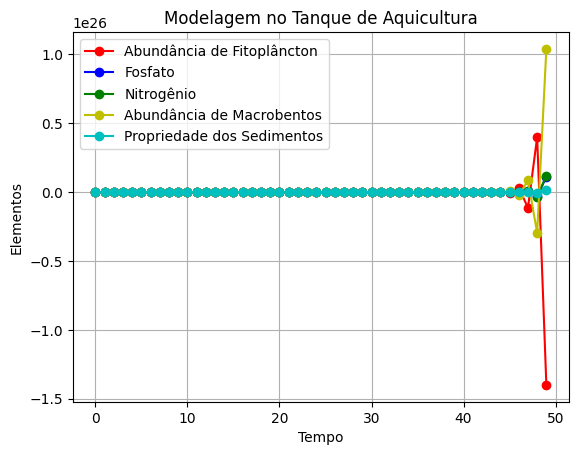

In [ ]:
# Plot do gráfico:
import pylab as pl

pl.plot(elementos[:,0],'ro-', label='Abundância de Fitoplâncton')
pl.plot(elementos[:,1],'bo-', label='Fosfato')
pl.plot(elementos[:,2],'go-', label='Nitrogênio')
pl.plot(elementos[:,3],'yo-', label='Abundância de Macrobentos')
pl.plot(elementos[:,4],'co-', label='Propriedade dos Sedimentos')
pl.xlabel('Tempo')
pl.ylabel('Elementos')
pl.title("Modelagem no Tanque de Aquicultura")
pl.legend()
pl.grid()

É possível concluir que o sistema é instável através dos autovalores obtidos dos pontos fixos, sendo estes, todos maiores do que 1 em módulo. Fato que se comprova na análise gráfica.